In [3]:
import os

def convert_classes(label_folder):
    """
    For each YOLO .txt label file in label_folder:
    - Delete lines where class_id is 11 or 12 (dot or degree)
    - For all other lines, set class_id to 0
    """
    for filename in os.listdir(label_folder):
        if not filename.endswith(".txt"):
            continue
        filepath = os.path.join(label_folder, filename)
        new_lines = []
        with open(filepath, "r") as f:
            for line in f:
                parts = line.strip().split()
                # skip malformed lines
                if len(parts) != 5:
                    continue
                cls_id = parts[0]
                # otherwise set class to '0'
                parts[0] = "0"
                new_lines.append(" ".join(parts))
        # overwrite file with filtered & converted labels
        with open(filepath, "w") as f:
            f.write("\n".join(new_lines))

    print("✅ Labels updated: all classes → 0")

# ── Usage ─────────────────────────────────────────────
label_folder_path = "dataset/labels/train"  # adjust as needed
convert_classes(label_folder_path)


✅ Labels updated: all classes → 0


In [ ]:
import os

def convert_all_classes_to_zero(label_folder):
    for filename in os.listdir(label_folder):
        if filename.endswith(".txt"):
            filepath = os.path.join(label_folder, filename)
            with open(filepath, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:  # YOLO format: class x_center y_center width height
                    parts[0] = "0"   # Set class_id to 0
                    new_lines.append(" ".join(parts))

            with open(filepath, "w") as f:
                f.write("\n".join(new_lines))

    print("✅ All class IDs converted to 0.")

# 🔧 Replace this with the path to your label folder
label_folder_path = "detection/temp ocr/labels"
convert_all_classes_to_zero(label_folder_path)


✅ All class IDs converted to 0.


In [24]:
import os
import cv2

def convert_to_grayscale(input_folder, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Supported image extensions
    supported_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(supported_extensions):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            # Read and convert to grayscale
            image = cv2.imread(input_path)
            if image is not None:
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(output_path, gray)
                print(f"✅ Saved: {output_path}")
            else:
                print(f"⚠️ Failed to read: {input_path}")


input_folder = "temp_ocr/images"
output_folder = "temp_ocr/images_gray"
convert_to_grayscale(input_folder, output_folder)


✅ Saved: temp_ocr/images_gray\005d2448__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C1005.jpg
✅ Saved: temp_ocr/images_gray\033ccf5b__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C0897.jpg
✅ Saved: temp_ocr/images_gray\0ba82d30__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C1570.jpg
✅ Saved: temp_ocr/images_gray\0c9cf4dd__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C0732.jpg
✅ Saved: temp_ocr/images_gray\0cac824f__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C0276.jpg
✅ Saved: temp_ocr/images_gray\0d628192__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C1514.jpg
✅ Saved: temp_ocr/images_gray\11081e37__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C0360.jpg
✅ Saved: temp_ocr/images_gray\11ce459a__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Ctemp_meter_data_frames%5C0277.jpg
✅ Saved: temp_oc

In [5]:
import os
import cv2
from ultralytics import YOLO

def crop_detections_from_images(model_path, input_folder, output_folder, conf_threshold=0.25):
    # Load the YOLO model
    model = YOLO(model_path)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Supported image types
    supported_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    image_count = 0  # For naming cropped outputs uniquely

    for filename in os.listdir(input_folder):
        if not filename.lower().endswith(supported_extensions):
            continue

        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        if image is None:
            print(f"⚠️ Failed to read {image_path}")
            continue

        # Run inference
        results = model(image)[0]  # Get first batch item
        boxes = results.boxes

        if boxes is not None:
            for i, box in enumerate(boxes):
                if box.conf < conf_threshold:
                    continue

                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cropped = image[y1:y2, x1:x2]

                if cropped.size > 0:
                    save_path = os.path.join(output_folder, f"crop_{image_count}.jpg")
                    cv2.imwrite(save_path, cropped)
                    print(f"✅ Saved: {save_path}")
                    image_count += 1
        else:
            print(f"No detections in {filename}")

# 🔧 Example usage
model_path = "Models/best.pt"  # Path to your YOLOv8 model
input_folder = "dataset/images/train"
output_folder = "crops"

crop_detections_from_images(model_path, input_folder, output_folder)



0: 480x640 1 digit, 190.1ms
Speed: 11.0ms preprocess, 190.1ms inference, 14.0ms postprocess per image at shape (1, 3, 480, 640)
✅ Saved: crops\crop_0.jpg

0: 288x640 3 digits, 94.5ms
Speed: 2.0ms preprocess, 94.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)
✅ Saved: crops\crop_1.jpg
✅ Saved: crops\crop_2.jpg
✅ Saved: crops\crop_3.jpg

0: 480x640 1 digit, 178.5ms
Speed: 5.5ms preprocess, 178.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
✅ Saved: crops\crop_4.jpg

0: 416x640 3 digits, 111.1ms
Speed: 3.0ms preprocess, 111.1ms inference, 15.0ms postprocess per image at shape (1, 3, 416, 640)
✅ Saved: crops\crop_5.jpg
✅ Saved: crops\crop_6.jpg
✅ Saved: crops\crop_7.jpg

0: 288x640 3 digits, 60.0ms
Speed: 2.0ms preprocess, 60.0ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)
✅ Saved: crops\crop_8.jpg
✅ Saved: crops\crop_9.jpg
✅ Saved: crops\crop_10.jpg

0: 288x640 3 digits, 60.5ms
Speed: 2.0ms preprocess, 60.5ms inference, 1.0m

In [7]:
import os
import cv2
import numpy as np
from ultralytics import YOLO

def crop_rotated_box(image, corners):
    """
    corners: array of 8 values [x1,y1, x2,y2, x3,y3, x4,y4]
    Returns a perspective-warped crop of that rotated box.
    """
    pts = corners.reshape(4, 2).astype(np.float32)
    # width = distance between pt0 and pt1, height = between pt1 and pt2
    width  = int(np.linalg.norm(pts[0] - pts[1]))
    height = int(np.linalg.norm(pts[1] - pts[2]))
    dst = np.array([[0,0],[width-1,0],[width-1,height-1],[0,height-1]], dtype="float32")
    M = cv2.getPerspectiveTransform(pts, dst)
    return cv2.warpPerspective(image, M, (width, height))

def obb_crop_and_save(model_path, input_folder, output_folder, conf_thresh=0.25):
    model = YOLO(model_path)
    os.makedirs(output_folder, exist_ok=True)
    exts = ('.png','.jpg','.jpeg','.bmp','.tiff')
    count = 0

    for fname in os.listdir(input_folder):
        if not fname.lower().endswith(exts):
            continue
        img_path = os.path.join(input_folder, fname)
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ cannot read {img_path}")
            continue

        # inference
        res = model.predict(source=img, verbose=False)[0]

        # pick rotated boxes if available, else axis‑aligned
        if hasattr(res, 'obb') and res.obb is not None:
            boxes = res.obb
        else:
            boxes = res.boxes

        if boxes is None or len(boxes) == 0:
            print(f"No detections in {fname}")
            continue

        for i in range(len(boxes)):
            conf = float(boxes.conf[i])
            if conf < conf_thresh:
                continue
            cls_id = int(boxes.cls[i])
            cls_name = res.names[cls_id]

            # extract corners vs xyxy
            if hasattr(boxes, 'xyxy') and boxes.xyxy is not None and boxes.xyxy.shape[1] == 8:
                corners = boxes.xyxy[i].cpu().numpy()
                crop = crop_rotated_box(img, corners)
            else:
                # fallback to axis-aligned
                x1,y1,x2,y2 = boxes.xyxy[i].cpu().numpy().astype(int)
                crop = img[y1:y2, x1:x2]

            # make class subfolder
            cls_dir = os.path.join(output_folder, cls_name)
            os.makedirs(cls_dir, exist_ok=True)

            out_path = os.path.join(cls_dir, f"{cls_name}_{count}.jpg")
            cv2.imwrite(out_path, crop)
            print(f"✅ Saved {out_path}")
            count += 1


model_path = "temp_ocr.pt"  # Your trained YOLO OBB model
input_folder = "images"
output_folder = "cropped_by_class"

obb_crop_and_save(model_path, input_folder, output_folder)


✅ Saved cropped_by_class\3\3_0.jpg
✅ Saved cropped_by_class\5\5_1.jpg
✅ Saved cropped_by_class\dot\dot_2.jpg
✅ Saved cropped_by_class\C\C_3.jpg
✅ Saved cropped_by_class\degree\degree_4.jpg
✅ Saved cropped_by_class\8\8_5.jpg
✅ Saved cropped_by_class\0\0_6.jpg
✅ Saved cropped_by_class\dot\dot_7.jpg
✅ Saved cropped_by_class\4\4_8.jpg
✅ Saved cropped_by_class\1\1_9.jpg
✅ Saved cropped_by_class\degree\degree_10.jpg
✅ Saved cropped_by_class\C\C_11.jpg
✅ Saved cropped_by_class\9\9_12.jpg
✅ Saved cropped_by_class\6\6_13.jpg
✅ Saved cropped_by_class\dot\dot_14.jpg
✅ Saved cropped_by_class\1\1_15.jpg
✅ Saved cropped_by_class\C\C_16.jpg
✅ Saved cropped_by_class\degree\degree_17.jpg
✅ Saved cropped_by_class\3\3_18.jpg
✅ Saved cropped_by_class\dot\dot_19.jpg
✅ Saved cropped_by_class\4\4_20.jpg
✅ Saved cropped_by_class\4\4_21.jpg
✅ Saved cropped_by_class\degree\degree_22.jpg
✅ Saved cropped_by_class\C\C_23.jpg
✅ Saved cropped_by_class\2\2_24.jpg
✅ Saved cropped_by_class\2\2_25.jpg
✅ Saved cropped_by

In [3]:
import os
import cv2

def convert_folder_images_to_grayscale(root_folder, overwrite=True, output_root=None):
    """
    root_folder: path containing class subfolders, each with images
    overwrite: if True, replace each file; if False, write to output_root preserving structure
    output_root: required if overwrite=False
    """
    if not overwrite and output_root is None:
        raise ValueError("If overwrite=False, you must specify output_root.")
    if output_root:
        os.makedirs(output_root, exist_ok=True)

    # iterate over each class folder
    for class_name in os.listdir(root_folder):
        class_dir = os.path.join(root_folder, class_name)
        if not os.path.isdir(class_dir):
            continue

        # determine where to save
        save_dir = class_dir if overwrite else os.path.join(output_root, class_name)
        os.makedirs(save_dir, exist_ok=True)

        # process each image file
        for fname in os.listdir(class_dir):
            if not fname.lower().endswith(('.png','.jpg','.jpeg','.bmp','.tiff')):
                continue

            in_path  = os.path.join(class_dir, fname)
            out_path = os.path.join(save_dir, fname)

            img = cv2.imread(in_path)
            if img is None:
                print(f"⚠️ cannot read {in_path}")
                continue

            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(out_path, gray)
            print(f"✅ Saved grayscale: {out_path}")

# ── Example Usage ────────────────────────────────────────────────────────────
cropped_root = "dataset_synthetic"       # the folder with class subfolders
# Option A: overwrite originals
convert_folder_images_to_grayscale(cropped_root, overwrite=True)


✅ Saved grayscale: dataset_synthetic\0\0f455dfd__Users%5C91880%5CDocuments%5CFuture%20Algorithm%5Cocr%5Ccropped%5Cfinal_ocr%5C116_0_131_31.jpg
✅ Saved grayscale: dataset_synthetic\0\0_0000.png
✅ Saved grayscale: dataset_synthetic\0\0_0001.png
✅ Saved grayscale: dataset_synthetic\0\0_0002.png
✅ Saved grayscale: dataset_synthetic\0\0_0003.png
✅ Saved grayscale: dataset_synthetic\0\0_0004.png
✅ Saved grayscale: dataset_synthetic\0\0_0005.png
✅ Saved grayscale: dataset_synthetic\0\0_0006.png
✅ Saved grayscale: dataset_synthetic\0\0_0007.png
✅ Saved grayscale: dataset_synthetic\0\0_0008.png
✅ Saved grayscale: dataset_synthetic\0\0_0009.png
✅ Saved grayscale: dataset_synthetic\0\0_0010.png
✅ Saved grayscale: dataset_synthetic\0\0_0011.png
✅ Saved grayscale: dataset_synthetic\0\0_0012.png
✅ Saved grayscale: dataset_synthetic\0\0_0013.png
✅ Saved grayscale: dataset_synthetic\0\0_0014.png
✅ Saved grayscale: dataset_synthetic\0\0_0015.png
✅ Saved grayscale: dataset_synthetic\0\0_0016.png
✅ Saved

### KNN

In [25]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

def load_image_data(dataset_path, image_size=(28,28)):
    X, y = [], []
    class_names = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path,d))])
    class_map = {name:i for i,name in enumerate(class_names)}
    for name in class_names:
        folder = os.path.join(dataset_path, name)
        for fn in os.listdir(folder):
            if fn.lower().endswith(('.png','.jpg','.jpeg','.bmp','.tiff')):
                img = cv2.imread(os.path.join(folder,fn), cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"⚠ Skipping unreadable {fn}")
                    continue
                img = cv2.resize(img, image_size)
                X.append(img.flatten())
                y.append(class_map[name])
    return np.array(X), np.array(y), class_map

if __name__ == "__main__":
    # ── CONFIG ───────────────────────────────────
    dataset_path = "recognition/dataset"  # << adjust this
    image_size   = (28,28)
    k            = 1
    test_size    = 0.2
    val_size     = 0.25  # of the remaining after test split → 0.25*0.8 = 0.2 of total
    random_state = 42
    # ───────────────────────────────────────────────

    print("🔄 Loading data...")
    X, y, class_map = load_image_data(dataset_path, image_size)
    total = len(y)
    print(f"✅ Loaded {total} samples across {len(class_map)} classes.\n")

    # First split off the test set
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    # Then split train+val into train and val
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=val_size, random_state=random_state, stratify=y_trainval
    )

    print(f"📊 Train: {len(y_train)} | Val: {len(y_val)} | Test: {len(y_test)}\n")

    # Train on train set
    print("🔧 Training 1-NN classifier...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate
    def evaluate(split_name, Xs, ys):
        preds = knn.predict(Xs)
        acc   = accuracy_score(ys, preds)
        print(f"--- {split_name} Accuracy: {acc:.4f}")
        print(f"Classification Report ({split_name}):")
        print(classification_report(ys, preds, target_names=sorted(class_map.keys())))
        print(f"Confusion Matrix ({split_name}):")
        print(confusion_matrix(ys, preds))
        print()

    print("\n✅ Evaluation on TRAIN set:")
    evaluate("TRAIN", X_train, y_train)

    print("✅ Evaluation on VAL set:")
    evaluate("VAL", X_val, y_val)

    print("✅ Evaluation on TEST set:")
    evaluate("TEST", X_test, y_test)

    # Retrain on all data
    print("🔄 Retraining on full dataset for final model...")
    final_knn = KNeighborsClassifier(n_neighbors=k)
    final_knn.fit(X, y)
    joblib.dump(final_knn, "knn_model.pkl")
    joblib.dump(class_map,  "class_map.pkl")
    print("✅ Final model saved as knn_model.pkl and class_map.pkl")


🔄 Loading data...
✅ Loaded 586 samples across 11 classes.

📊 Train: 351 | Val: 117 | Test: 118

🔧 Training 1-NN classifier...

✅ Evaluation on TRAIN set:
--- TRAIN Accuracy: 1.0000
Classification Report (TRAIN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        24
           C       1.00      1.00      1.00        90

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1

# CNN

In [19]:
import os
import cv2
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# 1. Load and preprocess data
def load_image_data(dataset_path, image_size=(28,28)):
    X, y = [], []
    class_names = sorted([d for d in os.listdir(dataset_path) 
                          if os.path.isdir(os.path.join(dataset_path,d))])
    class_map = {name:i for i,name in enumerate(class_names)}
    for name in class_names:
        folder = os.path.join(dataset_path, name)
        for fn in os.listdir(folder):
            if fn.lower().endswith(('.png','.jpg','.jpeg','.bmp','.tiff')):
                img = cv2.imread(os.path.join(folder,fn), cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, image_size)
                X.append(img)
                y.append(class_map[name])
    X = np.array(X, dtype="float32")
    y = np.array(y, dtype="int32")
    return X, y, class_map

dataset_path = "dataset_synthetic"  # adjust this
image_size = (128, 128)

X, y, class_map = load_image_data(dataset_path, image_size)
print(f"Loaded {X.shape[0]} samples across {len(class_map)} classes.")

# Normalize and reshape
X = X.reshape(-1, image_size[0], image_size[1], 1) / 255.0

# Split into train/val/test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

# 2. Build a CNN model
num_classes = len(class_map)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Train the model
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=4,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

# 4. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# 5. Save the model
model.save("digit_cnn_model.h5")
print("Model saved as 'digit_cnn_model.h5'")


Loaded 5476 samples across 12 classes.


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [18]:
pip install tensorflow 

  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp38-cp38-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.17 requires typing-extensions>=4.9.0; python_version < "3.10", but you have typing-extensions 4.5.0 which is incompatible.
albumentations 1.4.18 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.18 requires typing-extensions>=4.9.0; python_version < "3.10", but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.10.6 requires typing-extensions>=4.12.2, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.27.2 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.4.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip instal

# class balance CNN

In [103]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# 1. Load and preprocess data
def load_image_data(dataset_path, image_size=(28,28)):
    X, y = [], []
    class_names = sorted([d for d in os.listdir(dataset_path) 
                          if os.path.isdir(os.path.join(dataset_path,d))])
    class_map = {name:i for i,name in enumerate(class_names)}
    for name in class_names:
        folder = os.path.join(dataset_path, name)
        for fn in os.listdir(folder):
            if fn.lower().endswith(('.png','.jpg','.jpeg','.bmp','.tiff')):
                img = cv2.imread(os.path.join(folder,fn), cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, image_size)
                X.append(img)
                y.append(class_map[name])
    X = np.array(X, dtype="float32")
    y = np.array(y, dtype="int32")
    return X, y, class_map

dataset_path = "recognition/dataset"  # adjust this path accordingly
image_size = (128, 128)

X, y, class_map = load_image_data(dataset_path, image_size)
print(f"Loaded {X.shape[0]} samples across {len(class_map)} classes.")

# Normalize and reshape for CNN input
X = X.reshape(-1, image_size[0], image_size[1], 1) / 255.0

# Split into train/val/test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

# Calculate class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print(f"Computed class weights: {class_weights_dict}")

# 2. Build CNN model
num_classes = len(class_map)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Train the model with class weights
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=8,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    class_weight=class_weights_dict  # <-- class weights used here
)

# 4. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# 5. Save the model
model.save("digit_cnn_model.h5")
print("Model saved as 'digit_cnn_model.h5'")


Loaded 586 samples across 11 classes.
Train: 351, Val: 117, Test: 118
Computed class weights: {0: 1.4504132231404958, 1: 1.029325513196481, 2: 0.9116883116883117, 3: 0.9116883116883117, 4: 0.7977272727272727, 5: 1.6794258373205742, 6: 1.6794258373205742, 7: 1.9943181818181819, 8: 1.5954545454545455, 9: 1.3295454545454546, 10: 0.35454545454545455}


c:\Users\91880\gpu1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,163 (28.20 MB)

 Trainable params: 7,393,163 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.0723 - loss: 2.5435 - val_accuracy: 0.1026 - val_loss: 2.3980
Epoch 2/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.0738 - loss: 2.4341 - val_accuracy: 0.0513 - val_loss: 2.3992
Epoch 3/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.1231 - loss: 2.3435 - val_accuracy: 0.1026 - val_loss: 2.3982
Epoch 4/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.0458 - loss: 2.4891 - val_accuracy: 0.1026 - val_loss: 2.3989



Test accuracy: 0.1017
Model saved as 'digit_cnn_model.h5'


# data augment CNN

In [ ]:
# ── Install prerequisites (uncomment if needed) ───────────────────────────────
# !pip install tensorflow opencv-python matplotlib scikit-learn

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Load & preprocess data --------------------------------------------------
def load_data(path, image_size=(64,64)):
    X, y = [], []
    class_names = sorted(d for d in os.listdir(path) if os.path.isdir(os.path.join(path,d)))
    cmap = {n:i for i,n in enumerate(class_names)}
    for name in class_names:
        for fn in os.listdir(os.path.join(path,name)):
            if fn.lower().endswith(('.png','.jpg','.jpeg')):
                img = cv2.imread(os.path.join(path,name,fn), cv2.IMREAD_GRAYSCALE)
                if img is None: continue
                # simple binarize for clarity
                _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                img = cv2.resize(img, image_size)
                X.append(img)
                y.append(cmap[name])
    X = np.array(X, dtype='float32') / 255.0
    y = np.array(y, dtype='int32')
    # reshape for CNN
    X = X.reshape(-1, image_size[1], image_size[0], 1)
    print(f"Loaded {len(y)} samples across {len(class_names)} classes")
    return X, y, class_names

dataset_path = "recognition/dataset"  # <-- set your path here
image_size = (64, 64)
X, y, class_names = load_data(dataset_path, image_size)

# 2. Split --------------------------------------------------------------------
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)
print(f"Train: {len(y_train)}, Val: {len(y_val)}, Test: {len(y_test)}")

# 3. Compute class weights ---------------------------------------------------
weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
print("Class weights:", class_weights)

# 4. Data augmentation --------------------------------------------------------
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.7,1.3),
    shear_range=5,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 5. Build a compact CNN -----------------------------------------------------
def build_model(input_shape=(64,64,1), num_classes=len(class_names)):
    m = models.Sequential([
        layers.Input(input_shape),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    m.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return m

model = build_model(input_shape=(image_size[1],image_size[0],1))
model.summary()

# 6. Callbacks ----------------------------------------------------------------
early = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# 7. Train (no manual steps_per_epoch!) ---------------------------------------
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    class_weight=class_weights,
    callbacks=[early, reduce_lr],
    verbose=2
)

# 8. Evaluate -----------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# 9. Plot training curves ----------------------------------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy'); plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss'); plt.legend()
plt.show()

# 10. Save model --------------------------------------------------------------
model.save("seven_segment_cnn_model.keras")
print("Saved model to seven_segment_cnn_model.keras")


X_train shape: (351, 128, 128, 1)
y_train shape: (351,)
Class distribution in training set:
  Class 0: 22 samples
  Class 1: 31 samples
  Class 2: 35 samples
  Class 3: 35 samples
  Class 4: 40 samples
  Class 5: 19 samples
  Class 6: 19 samples
  Class 7: 16 samples
  Class 8: 20 samples
  Class 9: 24 samples
  Class C: 90 samples
Class 0: 38 samples
Class 1: 53 samples
Class 2: 59 samples
Class 3: 59 samples
Class 4: 66 samples
Class 5: 31 samples
Class 6: 31 samples
Class 7: 26 samples
Class 8: 33 samples
Class 9: 40 samples
Class C: 150 samples
Loaded 586 samples across 11 classes.
Train: 351, Val: 117, Test: 118
Computed class weights: {0: 1.4504132231404958, 1: 1.029325513196481, 2: 0.9116883116883117, 3: 0.9116883116883117, 4: 0.7977272727272727, 5: 1.6794258373205742, 6: 1.6794258373205742, 7: 1.9943181818181819, 8: 1.5954545454545455, 9: 1.3295454545454546, 10: 0.35454545454545455}


c:\Users\91880\gpu1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,680,043 (33.11 MB)

 Trainable params: 8,679,083 (33.11 MB)

 Non-trainable params: 960 (3.75 KB)

c:\Users\91880\gpu1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.0985 - loss: 2.2921Epoch 1 - train_acc: 0.0627, val_acc: 0.0940
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step - accuracy: 0.0968 - loss: 2.2953 - val_accuracy: 0.0940 - val_loss: 2.3974 - learning_rate: 0.0010
Epoch 2/20
 2/20 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.0469 - loss: 2.7319

c:\Users\91880\gpu1\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Epoch 2 - train_acc: 0.0312, val_acc: 0.0940
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0328 - loss: 2.5831 - val_accuracy: 0.0940 - val_loss: 2.3979 - learning_rate: 0.0010
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.1230 - loss: 2.3682Epoch 3 - train_acc: 0.1599, val_acc: 0.0940
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step - accuracy: 0.1248 - loss: 2.3700 - val_accuracy: 0.0940 - val_loss: 2.4011 - learning_rate: 0.0010
Epoch 4/20
 2/20 ━━━━━━━━━━━━━━━━━━━━ 8s 473ms/step - accuracy: 0.0625 - loss: 2.4225
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4 - train_acc: 0.0625, val_acc: 0.0940
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.0625 - loss: 2.4068 - val_accuracy: 0.0940 - val_loss: 2.4019 - learning_rate: 0.0010
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.1081 - loss: 2.3487Epoch 5 - train_acc: 0.1003, val_acc: 0.0940
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 502ms/step - accuracy: 0.1077 - loss

c:\Users\91880\gpu1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91880\gpu1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91880\gpu1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.09      1.00      0.17        11
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         8
           C       0.00      0.00      0.00        30

    accuracy                           0.09       118
   macro avg       0.01      0.09      0.02       118
weighted avg       0.01      0.09      0.02       118

Model saved as 'seven_segment_cnn_model.h5'


# Pretrained CNN

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import VGG16

# 1. Load and preprocess data
def load_image_data(dataset_path, image_size=(128,128)):
    X, y = [], []
    class_names = sorted([d for d in os.listdir(dataset_path) 
                          if os.path.isdir(os.path.join(dataset_path,d))])
    class_map = {name:i for i,name in enumerate(class_names)}
    for name in class_names:
        folder = os.path.join(dataset_path, name)
        for fn in os.listdir(folder):
            if fn.lower().endswith(('.png','.jpg','.jpeg','.bmp','.tiff')):
                img = cv2.imread(os.path.join(folder,fn), cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, image_size)
                X.append(img)
                y.append(class_map[name])
    X = np.array(X, dtype="float32")
    y = np.array(y, dtype="int32")
    return X, y, class_map

dataset_path = "recognition/large data"  # adjust this path
image_size = (128, 128)

X, y, class_map = load_image_data(dataset_path, image_size)
print(f"Loaded {X.shape[0]} samples across {len(class_map)} classes.")

# Convert grayscale to 3-channel by repeating
X = np.repeat(X[..., np.newaxis], 3, axis=-1) / 255.0

# Split into train/val/test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

# Compute class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

# 2. Data augmentation (no flipping, only rotation, zoom, shift)
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),      # small rotations
    layers.RandomZoom(0.1),          # zoom in/out
    layers.RandomTranslation(0.1, 0.1), # shifts horizontally and vertically
])

# 3. Build model using VGG16 base
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(128,128,3))
base_model.trainable = False  # freeze base initially

inputs = layers.Input(shape=(128,128,3))
x = data_augmentation(inputs)       # apply augmentation on training
x = base_model(x, training=False)   # use base model
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(len(class_map), activation='softmax')(x)

model = models.Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 4. Train the model with early stopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=16,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

# 5. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# 6. Optionally fine-tune the base model (unfreeze some layers) for better results
# Uncomment below to fine-tune

# base_model.trainable = True
# # Freeze first few layers if you want
# for layer in base_model.layers[:10]:
#     layer.trainable = False
#
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#
# fine_tune_history = model.fit(
#     X_train, y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     class_weight=class_weight_dict,
#     callbacks=[early_stop]
# )

# 7. Save the model
model.save("vgg16_digit_classifier.keras")
print("Model saved as 'vgg16_digit_classifier.keras'")
model.save("vgg16_digit_classifier.h5")
print("Model saved as 'vgg16_digit_classifier.h5'")


## inference with knn

In [61]:
# First, install required packages if you haven’t already:
# !pip install ultralytics opencv-python joblib

import os
import cv2
import numpy as np
import joblib
from ultralytics import YOLO

class YoloKNN_OCR:
    def __init__(self,
                 yolo_model_path: str,
                 knn_model_path: str,
                 class_map_path: str,
                 image_size: tuple = (28,28),
                 conf_threshold: float = 0.25):
        # Load YOLO detector
        self.detector = YOLO(yolo_model_path)
        # Load KNN classifier and invert class_map
        self.knn = joblib.load(knn_model_path)
        class_map = joblib.load(class_map_path)
        self.inv_map = {v:k for k,v in class_map.items()}
        self.image_size = image_size
        self.conf_threshold = conf_threshold

    def ocr_image(self, image_path: str) -> str:
        """
        1) Runs YOLO to detect digit boxes
        2) Sorts boxes left→right
        3) Crops each region, resizes, applies KNN.predict
        4) Returns concatenated digit string
        """
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Cannot read {image_path}")

        # 1) detect digits
        res = self.detector.predict(source=img, verbose=False)[0]
        boxes = res.boxes.xyxy.cpu().numpy()   # shape (n,4): x1,y1,x2,y2
        confs = res.boxes.conf.cpu().numpy()
        # filter by confidence
        keep = confs >= self.conf_threshold
        boxes = boxes[keep]

        if len(boxes) == 0:
            return ""  # no digits found

        # 2) sort by x1 (left coordinate)
        boxes = boxes[np.argsort(boxes[:,0])]

        digits = []
        for x1, y1, x2, y2 in boxes:
            # 3a) crop
            crop = img[int(y1):int(y2), int(x1):int(x2)]
            # 3b) to grayscale & resize
            gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, self.image_size)
            vec = resized.flatten().reshape(1, -1)
            # 3c) predict via KNN
            label_int = self.knn.predict(vec)[0]
            digits.append(self.inv_map[label_int])

        # 4) join and return
        return "".join(digits)

# ──────────────────────────────────────────────────────────────────────────────
# Usage in your notebook cell:

# 1. Configure paths:
yolo_model_path = "detection.pt"     # path to your YOLO .pt file
knn_model_path  = "knn_model.pkl"    # path to your saved KNN model
class_map_path  = "class_map.pkl"    # path to your class_map.pkl
test_image_path = "test/11.png"  # the single image you want to OCR

# 2. Instantiate the OCR pipeline:
ocr = YoloKNN_OCR(
    yolo_model_path=yolo_model_path,
    knn_model_path=knn_model_path,
    class_map_path=class_map_path,
    image_size=(28, 28),      # same as used in training
    conf_threshold=0.25       # adjust as needed
)

# 3. Run OCR and print result:
raw = ocr.ocr_image(test_image_path)
processed = (
    raw
    .replace("dot", ".")
    .replace("degree", "°")
)
print(f"Processed OCR: {processed}")


Processed OCR: CC3C


## inference with CNN

In [21]:
# In your notebook cell, after you’ve trained & saved the CNN as digit_cnn_model.h5:

import os
import cv2
import numpy as np
import joblib
from ultralytics import YOLO
from tensorflow.keras.models import load_model

class YoloCNN_OCR:
    def __init__(self,
                 yolo_model_path: str,
                 cnn_model_path: str,
                 image_size: tuple = (128,128),
                 conf_threshold: float = 0.25):
        # Load YOLO detector
        self.detector = YOLO(yolo_model_path)
        # Load CNN classifier
        self.cnn = load_model(cnn_model_path)
        # Load & invert class 
        self.inv_map = {v:k for k,v in class_map.items()}
        self.image_size = image_size
        self.conf_threshold = conf_threshold

    def ocr_image(self, image_path: str) -> str:
        """
        1) Run YOLO to detect digit boxes
        2) Sort boxes left→right
        3) Crop each region, grayscale & resize → CNN.predict
        4) Return concatenated digit string
        """
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Cannot read {image_path}")

        # 1) Detect
        res    = self.detector.predict(source=img, verbose=False)[0]
        boxes  = res.boxes.xyxy.cpu().numpy()    # (n,4)
        confs  = res.boxes.conf.cpu().numpy()
        keep   = confs >= self.conf_threshold
        boxes  = boxes[keep]

        if len(boxes) == 0:
            return ""

        # 2) Sort left→right
        boxes = boxes[np.argsort(boxes[:,0])]

        digits = []
        for x1,y1,x2,y2 in boxes:
            # 3a) Crop
            crop = img[int(y1):int(y2), int(x1):int(x2)]
            # 3b) Grayscale & resize
            gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, self.image_size)
            # 3c) Normalize & reshape for CNN
            inp = resized.astype("float32") / 255.0
            inp = inp.reshape(1, self.image_size[0], self.image_size[1], 1)
            # 3d) Predict
            probs = self.cnn.predict(inp, verbose=False)
            label_int = np.argmax(probs, axis=1)[0]
            digits.append(self.inv_map[label_int])

        # 4) Join
        return "".join(digits)

# ──────────────────────────────────────────────────────────────────────────────
# Example usage in your notebook:

# Paths
yolo_model_path = "Models/best.pt"          # your YOLO .pt file
cnn_model_path  = "digit_cnn_model.h5"    # your saved Keras CNN
      # saved during training
test_image_path = "new_data/99.jpg"          # the single image you want to OCR

ocr = YoloCNN_OCR(
    yolo_model_path=yolo_model_path,
    cnn_model_path=cnn_model_path,
    image_size=(128, 128),
    conf_threshold=0.25
)

raw = ocr.ocr_image(test_image_path)
print(f"Processed OCR: {raw}")


Processed OCR: 117


# VGG inference CNN

In [ ]:
import os
import cv2
import numpy as np
import joblib
from ultralytics import YOLO
from tensorflow.keras.models import load_model

class YoloCNN_OCR:
    def __init__(self,
                 yolo_model_path: str,
                 cnn_model_path: str,
                 class_map_path: str,
                 image_size: tuple = (128,128),
                 conf_threshold: float = 0.25):
        # Load YOLO detector model
        self.detector = YOLO(yolo_model_path)
        # Load CNN classifier model
        self.cnn = load_model(cnn_model_path)
        # Load & invert class map
        class_map = joblib.load(class_map_path)
        self.inv_map = {v:k for k,v in class_map.items()}
        self.image_size = image_size
        self.conf_threshold = conf_threshold

    def ocr_image(self, image_path: str) -> str:
        # Read image in BGR format
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Cannot read {image_path}")

        # 1) Run YOLO detection
        res = self.detector.predict(source=img, verbose=False)[0]
        boxes = res.boxes.xyxy.cpu().numpy()    # shape (n,4)
        confs = res.boxes.conf.cpu().numpy()
        keep = confs >= self.conf_threshold
        boxes = boxes[keep]

        if len(boxes) == 0:
            return ""

        # 2) Sort boxes left to right
        boxes = boxes[np.argsort(boxes[:,0])]

        digits = []
        for x1, y1, x2, y2 in boxes:
            # 3a) Crop detected box from original image
            crop = img[int(y1):int(y2), int(x1):int(x2)]
            # 3b) Resize crop to target input size for CNN (keep 3 channels)
            resized = cv2.resize(crop, self.image_size)  # shape (128,128,3)
            # 3c) Normalize pixel values to [0,1] and reshape to batch
            inp = resized.astype("float32") / 255.0
            inp = inp.reshape(1, self.image_size[0], self.image_size[1], 3)
            # 3d) Predict digit class using CNN
            probs = self.cnn.predict(inp, verbose=False)
            label_int = np.argmax(probs, axis=1)[0]
            digits.append(self.inv_map[label_int])

        # 4) Join all detected digits into a string
        return "".join(digits)


# Example usage:
if __name__ == "__main__":
    yolo_model_path = "detection.pt"                # your YOLO detection model path
    cnn_model_path  = "vgg16_digit_classifier.h5"  # your trained CNN model path
    class_map_path  = "class_map.pkl"               # class map path (joblib dump)
    test_image_path = "test/10.jpeg"                 # test image path

    ocr = YoloCNN_OCR(
        yolo_model_path=yolo_model_path,
        cnn_model_path=cnn_model_path,
        class_map_path=class_map_path,
        image_size=(128, 128),
        conf_threshold=0.25
    )

    raw_text = ocr.ocr_image(test_image_path)
    print(f"Processed OCR result: {raw_text}")


# Detection model check

(-0.5, 687.5, 285.5, -0.5)

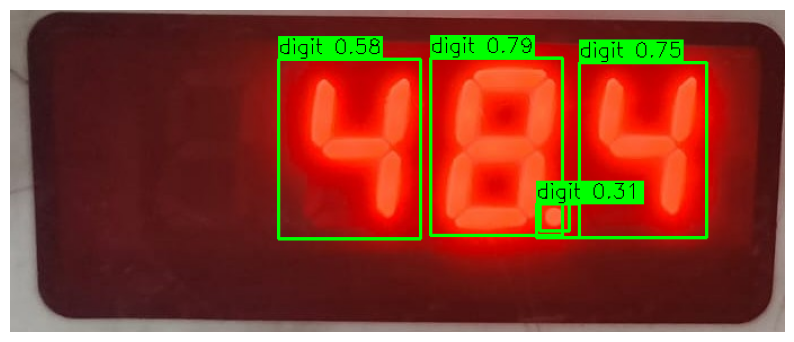

In [27]:
# 1. Install if needed (uncomment if you haven’t already)
# !pip install ultralytics opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 2. Configure paths
model_path = "Models/best.pt"            # your YOLO .pt file
image_path = "new_data/32.jpg"  # image to run detection on

# 3. Load model
model = YOLO(model_path)

# 4. Read image
img_bgr = cv2.imread(image_path)
if img_bgr is None:
    raise FileNotFoundError(f"Cannot read {image_path}")

# 5. Run inference
results = model.predict(source=img_bgr, verbose=False)[0]

# 6. Prepare to draw
img = img_bgr.copy()
names = results.names  # dict: class_id → class_name

# 7. Loop over detections
for box, conf, cls in zip(results.boxes.xyxy.cpu().numpy(),
                          results.boxes.conf.cpu().numpy(),
                          results.boxes.cls.cpu().numpy().astype(int)):
    x1, y1, x2, y2 = box.astype(int)
    label = f"{names[cls]} {conf:.2f}"
    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Draw label background
    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
    cv2.rectangle(img, (x1, y1 - 20), (x1 + w, y1), (0, 255, 0), -1)
    # Put text
    cv2.putText(img, label, (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

# 8. Convert BGR→RGB and display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis("off")


# synthetic data for C

In [15]:
import cv2
import numpy as np
import os
import random

output_dir = "realistic_C"
os.makedirs(output_dir, exist_ok=True)

def draw_slanted_segment(img, points):
    cv2.fillConvexPoly(img, np.array(points, dtype=np.int32), 0, lineType=cv2.LINE_AA)

def draw_C_like_segment(img_size=(200, 120)):
    # Create gray background with noise
    base = np.random.normal(170, 10, img_size).astype(np.uint8)

    # Define segments (slanted parallelograms)
    segments = {
        "a": [(30, 10), (90, 10), (80, 25), (40, 25)],
        "f": [(25, 15), (40, 25), (40, 85), (25, 95)],
        "e": [(25, 105), (40, 115), (40, 175), (25, 185)],
        "d": [(30, 175), (90, 175), (80, 160), (40, 160)],
    }

    # Draw segments
    for seg in ["a", "f", "e", "d"]:
        draw_slanted_segment(base, segments[seg])

    return base

def augment(img):
    # Random rotation
    angle = random.uniform(-15, 15)
    M = cv2.getRotationMatrix2D((img.shape[1] // 2, img.shape[0] // 2), angle, 1)
    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), borderValue=255)

    # Add Gaussian blur
    if random.random() < 0.5:
        img = cv2.GaussianBlur(img, (3, 3), 0)

    # Resize for model input if needed
    img = cv2.resize(img, (100, 200))

    return img

# Generate images
for i in range(500):
    img = draw_C_like_segment()
    img = augment(img)
    cv2.imwrite(os.path.join(output_dir, f"C_like_{i:04d}.png"), img)


In [16]:
import cv2
import numpy as np
import os
import random

output_dir = "low_contrast_C"
os.makedirs(output_dir, exist_ok=True)

def draw_segment(img, points, color=40):  # dull black
    cv2.fillConvexPoly(img, np.array(points, dtype=np.int32), color, lineType=cv2.LINE_AA)

def draw_low_contrast_C(img_size=(200, 120)):
    # Dark gray background with noise
    base = np.random.normal(90, 5, img_size).astype(np.uint8)

    # Define trapezoidal segments
    segments = {
        "a": [(30, 10), (90, 10), (80, 25), (40, 25)],
        "f": [(25, 15), (40, 25), (40, 85), (25, 95)],
        "e": [(25, 105), (40, 115), (40, 175), (25, 185)],
        "d": [(30, 175), (90, 175), (80, 160), (40, 160)],
    }

    for seg in ["a", "f", "e", "d"]:
        draw_segment(base, segments[seg])

    return base

def add_blur_low_contrast(img):
    # Random rotation
    angle = random.uniform(-5, 5)
    M = cv2.getRotationMatrix2D((img.shape[1]//2, img.shape[0]//2), angle, 1)
    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), borderValue=90)

    # Heavy blur to simulate real capture
    img = cv2.GaussianBlur(img, (5, 5), sigmaX=2)

    # Resize to match target style (small)
    img = cv2.resize(img, (32, 64), interpolation=cv2.INTER_AREA)

    return img

# Generate synthetic low-contrast C images
for i in range(500):
    img = draw_low_contrast_C()
    img = add_blur_low_contrast(img)
    cv2.imwrite(os.path.join(output_dir, f"lowC_{i:04d}.png"), img)


In [ ]:
import cv2
import numpy as np
import os
import random

output_dir = "diverse_C_variants"
os.makedirs(output_dir, exist_ok=True)

def draw_segment(img, points, color):
    cv2.fillConvexPoly(img, np.array(points, dtype=np.int32), color, lineType=cv2.LINE_AA)

def generate_base_C(img_size=(200, 120), thickness=1.0):
    base = np.full(img_size, random.randint(70, 120), dtype=np.uint8)  # Gray background

    # Thickness modifier
    t = thickness
    segments = {
        "a": [(30*t, 10*t), (90*t, 10*t), (80*t, 25*t), (40*t, 25*t)],
        "f": [(25*t, 15*t), (40*t, 25*t), (40*t, 85*t), (25*t, 95*t)],
        "e": [(25*t, 105*t), (40*t, 115*t), (40*t, 175*t), (25*t, 185*t)],
        "d": [(30*t, 175*t), (90*t, 175*t), (80*t, 160*t), (40*t, 160*t)],
    }

    seg_color = random.randint(20, 50)
    for seg in segments:
        draw_segment(base, segments[seg], seg_color)

    return base

def apply_augmentations(img):
    h, w = img.shape
    border_val = int(img[0, 0]) if img.ndim == 2 else tuple(map(int, img[0, 0]))

    # Affine: rotation + scale
    angle = random.uniform(-15, 15)
    scale = random.uniform(0.9, 1.1)
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, scale)
    img = cv2.warpAffine(img, M, (w, h), borderValue=border_val)

    # Perspective warp
    def random_shift(p, max_shift=10):
        return (p[0] + random.randint(-max_shift, max_shift),
                p[1] + random.randint(-max_shift, max_shift))
    
    pts1 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
    pts2 = np.float32([random_shift(pt) for pt in pts1])
    mat = cv2.getPerspectiveTransform(pts1, pts2)
    img = cv2.warpPerspective(img, mat, (w, h), borderValue=border_val)

    # Add Gaussian noise
    noise = np.random.normal(0, 8, img.shape).astype(np.uint8)
    img = cv2.add(img, noise)

    # Brightness/Contrast
    alpha = random.uniform(0.8, 1.2)
    beta = random.randint(-20, 20)
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    # Blur
    if random.random() > 0.5:
        k = random.choice([3, 5])
        img = cv2.GaussianBlur(img, (k, k), sigmaX=1)

    return cv2.resize(img, (64, 128), interpolation=cv2.INTER_AREA)


# Generate synthetic images
for i in range(500):
    thickness = random.uniform(0.9, 1.2)
    base = generate_base_C(thickness=thickness)
    final = apply_augmentations(base)
    cv2.imwrite(os.path.join(output_dir, f"c_variant_{i:04d}.png"), final)


In [25]:
import cv2
import numpy as np
import os

def preprocess_seven_segment_image(img_path, save_path, target_size=(64, 128)):
    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unreadable: {img_path}")

    # Resize to target size (used during training)
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

    # Apply Gaussian blur (optional denoising)
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Normalize contrast using histogram equalization
    img = cv2.equalizeHist(img)

    # Binarize (if needed, comment out if your model was trained on grayscale)
    # _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Save preprocessed image
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    cv2.imwrite(save_path, img)

    return img
preprocess_seven_segment_image("test/11.png", "preprocessed/input_preprocessed.png")


array([[  0,   0,   0, ...,  42,  80, 157],
       [  0,   0,   0, ...,  42,  82, 166],
       [  1,   1,   1, ...,  45,  84, 191],
       ...,
       [191, 205, 205, ...,  88,  67,  47],
       [216, 216, 226, ...,  76,  57,  45],
       [216, 216, 226, ...,  76,  57,  42]], dtype=uint8)

In [96]:
import cv2
import numpy as np

def contour_detection(input_path, output_path=None):
    # Step 1: Load in grayscale
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # Step 2: Thresholding
    _, thresh = cv2.threshold(img, 10, 20, cv2.THRESH_BINARY_INV)

    # Step 3: Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Create blank white canvas to draw on
    contour_img = np.ones_like(img) * 255  # white background

    # Step 5: Draw contours (in black)
    cv2.drawContours(contour_img, contours, -1, (0), thickness=1)

    # Step 6: Save or return
    if output_path:
        cv2.imwrite(output_path, contour_img)

    return contour_img

# Example usage
contour_detection("test/4.jpg", "contour_detected.jpg")


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)